En este NoteBook vamos a mostrar como implementar y visualizar el conjunto de Mandelbrot. El conjunto de Mandelbrot es muy conocido y es un hermoso fractal descubierto en los años 70. La primera imagen de este objeto fue computarizada en 1978

La idea básica detrás del conjunto de Mandelbrot es que tienes un plano en R2 que representa una imagen. Cada punto de ese plano es un número complejo $ z = x + y i $. Ahora, suponga que sucede si, para cada punto $ c $ en el plano, itera una y otra vez calculando un nuevo número de la siguiente manera:

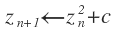
En esta formula $z_0 = 0$ and $c$ es el punto en el plano que estas viendo.

En esta situación, pueden suceder dos cosas diferentes. A medida que avanza la cantidad de iteraciones, $|z|$ tiende al infinito o tiende a 0. Matematicamente, los puntos donde tiende a cero, son parte del conjunto y son de color negro. Los puntos que tienden al infinito no son parte del conjunto y son de color blanco.

Dado que en una computadora no se puede iterar un número infinito de veces, normalmente se establece un límite en la cantidad de veces que se hace este cálculo. Además, puede usar el "qué tan rápido" $|z|$ irá al infinito para colorear el conjunto. También puede verificar si $|z|$ va a infinito simplemente comparando $|z|$ con 2. Si ha crecido tanto, ciertamente no forma parte del conjunto.

Por lo tanto, para un punto $c$, definamos una función _ConjMandel_ que nos diga el número de iteraciones que el punto está llevando a divergir al infinito.

In [8]:
function mandel_pt(c, MAX_ITER=100) #Regresamos al numero de iteraciones un punto tiende a irse al infinito en el conjuto de Mandelbrot
    iter = 0
    z    = 0
    while (iter < MAX_ITER)
        z = z^2 + c #La formuladel conjunto
        iter+= 1 #Aqui vamos a hacer un maximo de iteracciones
        if abs(z) > 2.0
            return iter
        end
    end
    0
end

mandel_pt (generic function with 2 methods)

Ahora vamos a asignar todos los puntos en un rectángulo, que representan el plano complejo que van de $z_{min}$ a $z_{max}$  y que calcula la imagen correspondiente, usando mandel_it.


In [9]:
# Regresando al conjunto de Mandelbrot asignando cada punto al número correspondiente de iteraciones
mandel(zmin, zmax, resolution=1000) =
    [ mandel_pt(complex(j, i)) for i=linspace(zmin.im, zmax.im, resolution), j=linspace(zmin.re, zmax.re, resolution) ]

mandel (generic function with 2 methods)

Ahora que tenemos el conjunto listo lo calculamos

In [10]:
(zmin, zmax) = (-2.2-1.5im, +1.2+1.5im) #Plano imaginario

(-2.2 - 1.5im, 1.2 + 1.5im)

In [11]:
mandel_set = mandel(zmin, zmax) #Conjunto de Mandelbrot

1000×1000 Array{Int64,2}:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1     2  2  2  2  2  2  2  2  2  2  2  2
 1  1  1  1  1  1  1  1  1  1  1  1  1

Ya que terminamos lo graficamos

In [12]:
using PyPlot # Importamos la libreria

In [13]:
to_extent(zmin, zmax) = [zmin.re, zmax.re, zmin.im, zmax.im] #Funcion para graficar como una matriz

to_extent (generic function with 1 method)

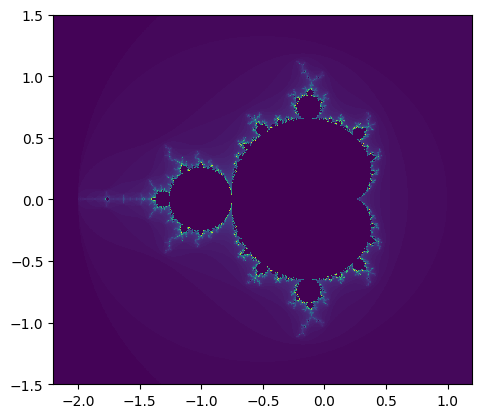

PyObject <matplotlib.image.AxesImage object at 0x7fd75abaa950>

In [14]:
imshow(mandel_set, extent=to_extent(zmin, zmax))# Graficamos